# Training Different Model

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Github Fetch

In [2]:
!git clone https://github.com/utsavdarlami/sandstone_segmentation.git

Cloning into 'sandstone_segmentation'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 268 (delta 130), reused 190 (delta 64), pack-reused 0
Receiving objects: 100% (268/268), 11.19 MiB | 27.54 MiB/s, done.
Resolving deltas: 100% (130/130), done.


### Prepare the dataset

In [3]:
!pwd

/content


In [4]:
cd "./sandstone_segmentation"

/content/sandstone_segmentation


In [5]:
!pwd
!ls

/content/sandstone_segmentation
data	  models     README.org  requirements.txt  src
Makefile  notebooks  reports	 results


In [7]:
!make dataset n_images=1 # select number of images for processing 

mkdir -p ./data/processed
python ./src/prepare_dataset.py	1
Preparing Dataset with 1 images
- Extracting the features from Sandstone_Versa0000.tif
- Done Extracting the features from Sandstone_Versa0000.tif
- Saving the dataframe as final_dataset.csv is ../data/processed/
- Shape (1019904, 60)
- Columns Index(['gabor_0', 'gabor_1', 'gabor_2', 'gabor_3', 'gabor_4', 'gabor_5',
       'gabor_6', 'gabor_7', 'gabor_8', 'gabor_9', 'gabor_10', 'gabor_11',
       'gabor_12', 'gabor_13', 'gabor_14', 'gabor_15', 'gabor_16', 'gabor_17',
       'gabor_18', 'gabor_19', 'gabor_20', 'gabor_21', 'gabor_22', 'gabor_23',
       'gabor_24', 'gabor_25', 'gabor_26', 'gabor_27', 'gabor_28', 'gabor_29',
       'gabor_30', 'gabor_31', 'gabor_32', 'gabor_33', 'gabor_34', 'gabor_35',
       'gabor_36', 'gabor_37', 'gabor_38', 'gabor_39', 'gabor_40', 'gabor_41',
       'gabor_42', 'gabor_43', 'gabor_44', 'gabor_45', 'gabor_46', 'gabor_47',
       'Original', 'Entropy', 'Gaussian3', 'Gaussian7', 'Sobel', 'Canny',

## Training begins

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
# %time
import os

In [9]:
dataset_path = "./data/processed/final_dataset.csv"
dataset_path

'./data/processed/final_dataset.csv'

In [ ]:
# del final_dataframe

In [10]:
final_dataframe = pd.read_csv(dataset_path)

In [11]:
final_dataframe.head()

,gabor_0,gabor_1,gabor_2,gabor_3,gabor_4,gabor_5,gabor_6,gabor_7,gabor_8,gabor_9,gabor_10,gabor_11,gabor_12,gabor_13,gabor_14,gabor_15,gabor_16,gabor_17,gabor_18,gabor_19,gabor_20,gabor_21,gabor_22,gabor_23,gabor_24,gabor_25,gabor_26,gabor_27,gabor_28,gabor_29,gabor_30,gabor_31,gabor_32,gabor_33,gabor_34,gabor_35,gabor_36,gabor_37,gabor_38,gabor_39,gabor_40,gabor_41,gabor_42,gabor_43,gabor_44,gabor_45,gabor_46,gabor_47,Original,Entropy,Gaussian3,Gaussian7,Sobel,Canny,Robert,Scharr,Prewitt,Median,Variance,Mask_label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0,29
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0,29
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0,29
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0,29
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0,0,29


In [12]:
X = final_dataframe.drop('Mask_label', axis = 1)
y = final_dataframe['Mask_label']

In [13]:
final_dataframe['Mask_label'].value_counts()

29     522177
76     437060
150     45675
226     14992
Name: Mask_label, dtype: int64

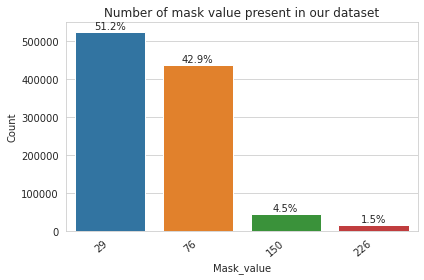

In [14]:
sns.set_style("whitegrid")
ax = sns.countplot(x=final_dataframe['Mask_label'],linewidth=1)
plt.title('Number of mask value present in our dataset')
plt.xlabel('Mask_value')
plt.ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = len(final_dataframe)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    i = p.get_x() + p.get_width() / 2
    j = p.get_height()
    ax.annotate(percentage, (i, j), ha='center', va='center')
plt.tight_layout()
plt.show()

### Split the data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=101)

In [16]:
y_train.value_counts()

29     365465
76     305923
150     32029
226     10515
Name: Mask_label, dtype: int64

In [17]:
y_test.value_counts()

29     156712
76     131137
150     13646
226      4477
Name: Mask_label, dtype: int64

### Model import

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Max Depth search on dataset with 1 image

### Depths = [10, 15, 20, 25, None]

In [19]:
depths = [10, 15, 20, 25, None]
for depth in depths:
    rf_model = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    print(f"------Depth = {depth}------")
    print(classification_report(y_test, predictions))

------Depth = 10------
              precision    recall  f1-score   support

          29       0.99      0.99      0.99    156712
          76       0.98      0.99      0.99    131137
         150       0.87      0.73      0.79     13646
         226       0.99      0.98      0.98      4477

    accuracy                           0.98    305972
   macro avg       0.96      0.92      0.94    305972
weighted avg       0.98      0.98      0.98    305972

------Depth = 15------
              precision    recall  f1-score   support

          29       0.99      0.99      0.99    156712
          76       0.98      0.99      0.99    131137
         150       0.88      0.77      0.82     13646
         226       0.99      0.98      0.99      4477

    accuracy                           0.98    305972
   macro avg       0.96      0.93      0.95    305972
weighted avg       0.98      0.98      0.98    305972

------Depth = 20------
              precision    recall  f1-score   support

      

### Depths = [14, 16, 17, 18, 19]

In [20]:
depths = [14, 16, 17, 18, 19]
for depth in depths:
    rf_model = RandomForestClassifier(max_depth=depth, random_state=42)
    rf_model.fit(X_train, y_train)
    predictions = rf_model.predict(X_test)
    print(f"------Depth = {depth}------")
    print(classification_report(y_test, predictions))

------Depth = 14------
              precision    recall  f1-score   support

          29       0.99      0.99      0.99    156712
          76       0.98      0.99      0.99    131137
         150       0.88      0.76      0.82     13646
         226       0.99      0.98      0.98      4477

    accuracy                           0.98    305972
   macro avg       0.96      0.93      0.95    305972
weighted avg       0.98      0.98      0.98    305972

------Depth = 16------
              precision    recall  f1-score   support

          29       0.99      0.99      0.99    156712
          76       0.98      0.99      0.99    131137
         150       0.88      0.78      0.82     13646
         226       0.99      0.98      0.99      4477

    accuracy                           0.98    305972
   macro avg       0.96      0.94      0.95    305972
weighted avg       0.98      0.98      0.98    305972

------Depth = 17------
              precision    recall  f1-score   support

      

### Final Model trained on 5 images with max_depth = 20

In [ ]:
rf_model = RandomForestClassifier(max_depth=20, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
max([estimator.tree_.max_depth for estimator in rf_model.estimators_])
# default ma 44
# max depth of the estimators

20

### Classification Report

#### Test Dataset

In [ ]:
predictions = rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          29       0.99      0.99      0.99    753897
          76       0.99      0.99      0.99    705539
         150       0.88      0.78      0.83     53203
         226       0.99      0.98      0.98     17217

    accuracy                           0.99   1529856
   macro avg       0.96      0.94      0.95   1529856
weighted avg       0.99      0.99      0.99   1529856



In [ ]:
accuracy_score(y_test, predictions)

0.9858993264725568

#### Train Dataset

In [ ]:
predictions_train = rf_model.predict(X_train)

In [ ]:
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

          29       1.00      1.00      1.00    754190
          76       1.00      1.00      1.00    705192
         150       0.98      0.95      0.97     53087
         226       1.00      1.00      1.00     17387

    accuracy                           1.00   1529856
   macro avg       0.99      0.99      0.99   1529856
weighted avg       1.00      1.00      1.00   1529856



## Confusion Matrix

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
categories = ["29", "76", "150", "226"]
print(cf_matrix)
print(cf_matrix[0].sum())

[[748577   2002   3310      8]
 [  1584 701213   2525    217]
 [  5980   5563  41660      0]
 [     0    383      0  16834]]
753897


In [ ]:
print(cf_matrix[0])

[748577   2002   3310      8]


In [ ]:
cf_matrix.astype(np.float).sum(axis=1)

array([753897., 705539.,  53203.,  17217.])

In [ ]:
n_cf_matrix = cf_matrix / cf_matrix.astype(np.float).sum(axis=1)
print(np.round(n_cf_matrix, 3))

[[0.993 0.003 0.062 0.   ]
 [0.002 0.994 0.047 0.013]
 [0.008 0.008 0.783 0.   ]
 [0.    0.001 0.    0.978]]


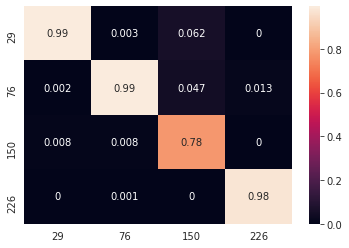

In [ ]:
cm = sns.heatmap(np.round(n_cf_matrix, 3), 
            annot=True,
            xticklabels = categories,
            yticklabels = categories)
cm.figure.savefig("s_rf_confusion_matrix.png")

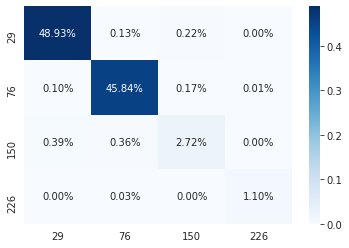

In [ ]:
ncf = sns.heatmap(cf_matrix/np.sum(cf_matrix),
            annot=True,
            fmt='.2%',
            cmap='Blues',
            xticklabels=categories,
            yticklabels=categories)
ncf.figure.savefig("s_rf_norm_cm.png")

# Pickling the model

In [ ]:
import pickle

In [ ]:
# Saving model to disk
"""
              precision    recall  f1-score   support

          29       0.99      0.99      0.99    753897
          76       0.99      0.99      0.99    705539
         150       0.88      0.78      0.83     53203
         226       0.99      0.98      0.98     17217

    accuracy                           0.99   1529856
   macro avg       0.96      0.94      0.95   1529856
weighted avg       0.99      0.99      0.99   1529856
"""
pickle.dump(rf_model, open('./models/rf.pkl','wb'))

In [ ]:
# Loading svm model to compare the results
rf_loaded_model = pickle.load( open('./models/rf.pkl','rb'))

In [ ]:
dummy_X = X_test.iloc[0]
dummy_Y = y_test.iloc[0]

In [ ]:
pred_Y = rf_loaded_model.predict([dummy_X])
print(pred_Y)
print(dummy_Y)

[76]
76


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Saving model to disk
# pickle.dump(rf_model, open('../drive/MyDrive/codes/rf.pkl','wb'))